# Classify Fashion Items 

Using Keras and the Fashion-MNIST Dataset

We will use a neural network to classify closing items from grayscale 28x28 pixel images. The dataset is Fashion-MNIST, a more challenging and modern alternative to classic MNIST digits. It has become one of the most popular "hello-world" problem datasets for vision recognition.

### Code

#### Import necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### 1. Load and Normalize the Data

The Fashion-MNIST dataset consists of 70,000 grayscale 
images of clothing items, each 28x28 pixels.
It is divided into a training set of 60,000 images 
and a test set of 10,000 images.
Each image is labeled with one of 10 classes: 
T-shirt/top, Trouser, Pullover, Dress, Coat, 
Sandal, Shirt, Sneaker, Bag, Ankle boot.
The dataset is available directly from Keras.

In [2]:

# Step 1: Load the Fashion-MNIST dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


#### 2. Define the class names

In [5]:
# Step 2: Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 3. Build the model

A simple feedforward neural network model using Keras
The model consists of:
- a flattening layer
- a dense layer with ReLU activation
- a dropout layer for regularization (randomly mutes the output of a percentage of layers)
- an output layer with softmax activation for multi-class classification.


In [57]:
# Step 3: Build the model

model = keras.Sequential([
    keras.Input(shape=(28, 28)),                 # Define input shape explicitly
    layers.Flatten(),                            # Flatten the 2D images to 1D vectors   
    layers.Dense(128, activation='relu'),        # Fully connected layer with 128 neurons
    layers.Dense(64,  activation='relu'),        # Fully connected layer with 64 neurons
    layers.Dense(32,  activation='relu'),        # Fully connected layer with 64 neurons
    layers.Dropout(0.1),                         # Dropout regularization
    layers.Dense(10, activation='softmax')       # Output layer for 10 classes
])

#### 4. Compile the model

The model is compiled with an optimizer, loss function, and metrics to track during training. The optimizer is 'adam', which is a popular choice for training neural networks. The loss function is 'sparse_categorical_crossentropy', suitable for multi-class classification with integer labels. The metric 'accuracy' is used to evaluate the model's performance during training and testing.  

In [58]:
# Step 4: Compile the model

model.compile(
    optimizer='adam',                           # Optimizer to update weights
    loss='sparse_categorical_crossentropy',     # Loss function for integer labels
    metrics=['accuracy']                        # Report accuracy during training
)

#### 5. Train the model

In [59]:
# Step 5: Train the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4855 - loss: 4.8155 - val_accuracy: 0.7418 - val_loss: 0.7610
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7055 - loss: 0.8060 - val_accuracy: 0.7720 - val_loss: 0.6362
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7662 - loss: 0.6629 - val_accuracy: 0.8188 - val_loss: 0.6579
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7916 - loss: 0.5846 - val_accuracy: 0.8250 - val_loss: 0.5207
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8124 - loss: 0.5227 - val_accuracy: 0.8538 - val_loss: 0.4143
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8278 - loss: 0.4802 - val_accuracy: 0.8530 - val_loss: 0.4435
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8436 - loss: 0.4430 - val_accuracy: 0.8587 - val_loss: 0.4073
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8482 - loss: 0.4241 - 

#### 6. Evaluate Model

In [60]:
# Step 6: Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.4147

Test accuracy: 0.8593999743461609


#### 7. Predictions

In [61]:

# Step 7: Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


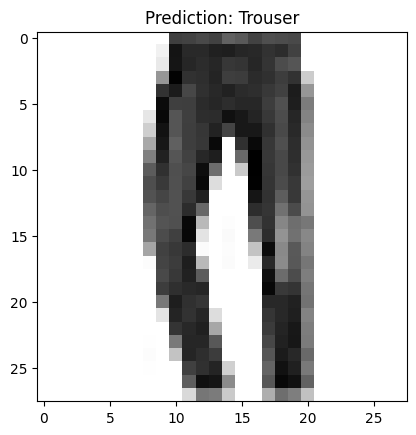

In [66]:
# Show example prediction
i = 5
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.title(f"Prediction: {class_names[np.argmax(predictions[i])]}")
plt.show()